In [8]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
from tqdm import tqdm
from math import ceil
import matplotlib.pyplot as plt
from argparse import ArgumentParser
import random
def set_seed(seed_value=42):
    random.seed(seed_value)
    np.random.seed(seed_value)
    torch.manual_seed(seed_value)
    if torch.cuda.is_available():
        torch.cuda.manual_seed(seed_value)
        torch.cuda.manual_seed_all(seed_value)
MODULUS = 97
K = 2
set_seed()
parser = ArgumentParser()
parser.add_argument("--device", type=str, default="cuda" if torch.cuda.is_available() else "cpu")
parser.add_argument("--epochs", type=int, default = 5000)
parser.add_argument("--lr", type=float, default=5e-5)
parser.add_argument("--MODULUS", type=int, default=MODULUS)
parser.add_argument("--K", type=int, default=K)
parser.add_argument("--portion", type=float, default=0.5)
# specific to BiRNN
parser.add_argument("--BiRNN_layers", type=int, default=3)
parser.add_argument("--BiRNN_hid_dim", type=int, default=128)
parser.add_argument("--BiRNN_optim", type=str, choices=["RMSprop", "AdamW", "Adam", "SGD","NSGD"], default="Adam")

args,unknown = parser.parse_known_args()

In [9]:
data = np.load("BiRNN_K=2_Adam_97_5000_0.5.npy").T
data.shape

(5, 5000)

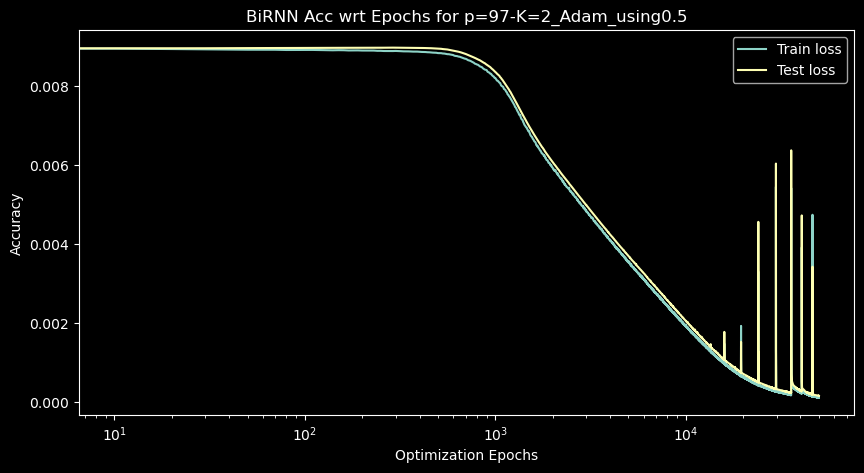

In [10]:
plt.figure(figsize=(10,5))
plt.plot(data[0], data[3], label="Train loss")
plt.plot(data[0], data[4], label="Test loss")
plt.xlabel("Optimization Epochs")
plt.ylabel("Accuracy")
plt.title(f"BiRNN Acc wrt Epochs for p={args.MODULUS}-K={args.K}_{args.BiRNN_optim}_using{args.portion}")
plt.xscale("log")
plt.legend()
plt.savefig(f"BiRNN_{args.BiRNN_optim}_{args.MODULUS}_K={args.K}_{args.epochs}_{args.portion}_loss.png")
plt.show()